# Lesson 3: Deep Learning & Neural Networks

Welcome to the third lesson in our AI course! Now that we understand AI basics and Machine Learning fundamentals, let's dive into Deep Learning - the technology powering many of today's most impressive AI breakthroughs.


## What is Deep Learning?

**Deep Learning** is a subset of machine learning that uses multi-layered neural networks to learn from data.

### Key characteristics of Deep Learning:

- Uses neural networks with many layers (hence "deep")
- Automatically extracts features from raw data
- Excels at finding patterns in unstructured data (images, text, audio)
- Requires large amounts of data and computational power
- Can achieve state-of-the-art results in complex tasks

### Why Deep Learning has revolutionized AI:

1. **Feature learning**: Traditional ML requires manual feature engineering, while deep learning automatically learns the important features
2. **Scalability**: Performance continues to improve with more data and larger models
3. **Versatility**: Can be applied to many different domains with similar architectures


## Neural Networks: The Building Blocks of Deep Learning

Neural Networks are computing systems inspired by the biological neural networks in animal brains. They consist of connected nodes (neurons) organized in layers.


### The Biological Inspiration

Just as the human brain consists of interconnected neurons that process and transmit signals, artificial neural networks consist of interconnected nodes that process and transmit numerical data.

![Biological vs Artificial Neuron](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Neural_network_example.svg/300px-Neural_network_example.svg.png)

However, it's important to note that artificial neural networks are highly simplified compared to biological neurons, and the resemblance is primarily conceptual.


## How Neural Networks Work

### The Basic Structure

A neural network consists of layers of interconnected nodes:

1. **Input Layer**: Receives the initial data
2. **Hidden Layers**: Process the data through weighted connections
3. **Output Layer**: Produces the final result

Let's visualize a simple neural network:


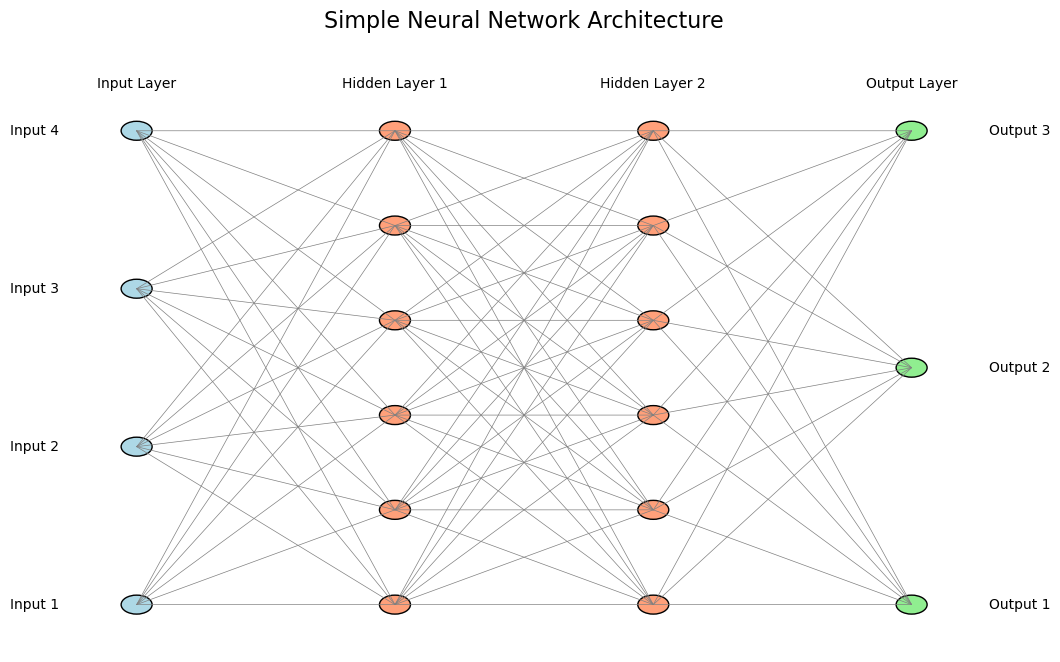

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, ConnectionPatch


def draw_neural_network(ax, layer_sizes):
    """Draw a neural network with the given layer sizes"""
    # Determine the number of layers
    n_layers = len(layer_sizes)
    # The y-position of all layers
    layer_y = np.linspace(0, 1, n_layers)
    # The vertical distance between nodes in each layer
    node_spacing = [1.0 / max(1, l - 1) if l > 1 else 1.0 for l in layer_sizes]
    # Positions of nodes in each layer
    node_positions = []

    # Calculate node positions for each layer
    for i, (l, spacing) in enumerate(zip(layer_sizes, node_spacing)):
        y_positions = np.linspace(0, 1, l) if l > 1 else [0.5]
        layer_pos = [(i / (n_layers - 1), y) for y in y_positions]
        node_positions.append(layer_pos)

    # Draw the nodes
    for i, layer_pos in enumerate(node_positions):
        for j, (x, y) in enumerate(layer_pos):
            label = ""
            if i == 0:
                label = f"Input {j+1}"
            elif i == n_layers - 1:
                label = f"Output {j+1}"

            color = "lightblue" if i == 0 else "lightgreen" if i == n_layers - 1 else "lightsalmon"
            circle = Circle((x, y), 0.02, color=color, ec="black")
            ax.add_patch(circle)

            # Add label next to the node
            if label:
                if i == 0:  # Input layer
                    ax.text(x - 0.1, y, label, ha="right", va="center")
                else:  # Output layer
                    ax.text(x + 0.1, y, label, ha="left", va="center")

    # Draw the connections between nodes
    for i in range(n_layers - 1):
        for x1, y1 in node_positions[i]:
            for x2, y2 in node_positions[i + 1]:
                line = ConnectionPatch(
                    (x1, y1), (x2, y2), "data", "data", arrowstyle="-", color="gray", linewidth=0.5
                )
                ax.add_patch(line)

    # Add layer labels
    for i, y in enumerate(layer_y):
        if 0 < i < n_layers - 1:
            ax.text(i / (n_layers - 1), 1.1, f"Hidden Layer {i}", ha="center", va="center")

    ax.text(0, 1.1, "Input Layer", ha="center", va="center")
    ax.text(1, 1.1, "Output Layer", ha="center", va="center")

    # Set the limits and remove ticks
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")


# Create a figure and draw a neural network
fig, ax = plt.subplots(figsize=(12, 8))
draw_neural_network(ax, [4, 6, 6, 3])  # 4 inputs, 2 hidden layers with 6 neurons each, 3 outputs
plt.title("Simple Neural Network Architecture", fontsize=16)
plt.show()

### The Mathematics Behind Neural Networks

Each connection between neurons has a **weight**, and each neuron has a **bias**. The weighted sum of inputs plus the bias is passed through an **activation function** to produce the neuron's output.

For a single neuron, the output is calculated as:

$$output = f(\sum_{i=1}^{n} w_i x_i + b)$$

Where:

- $f$ is the activation function
- $w_i$ are the weights
- $x_i$ are the inputs
- $b$ is the bias

Let's implement a single neuron to understand this better:


Inputs: [0.5, 0.3, 0.2, 0.8]
Weights: [0.4, -0.2, 0.1, 0.7]
Bias: -0.5

Weighted sum: 0.21999999999999997

Outputs with different activation functions:
Linear: 0.2200
Relu: 0.2200
Sigmoid: 0.5548
Tanh: 0.2165


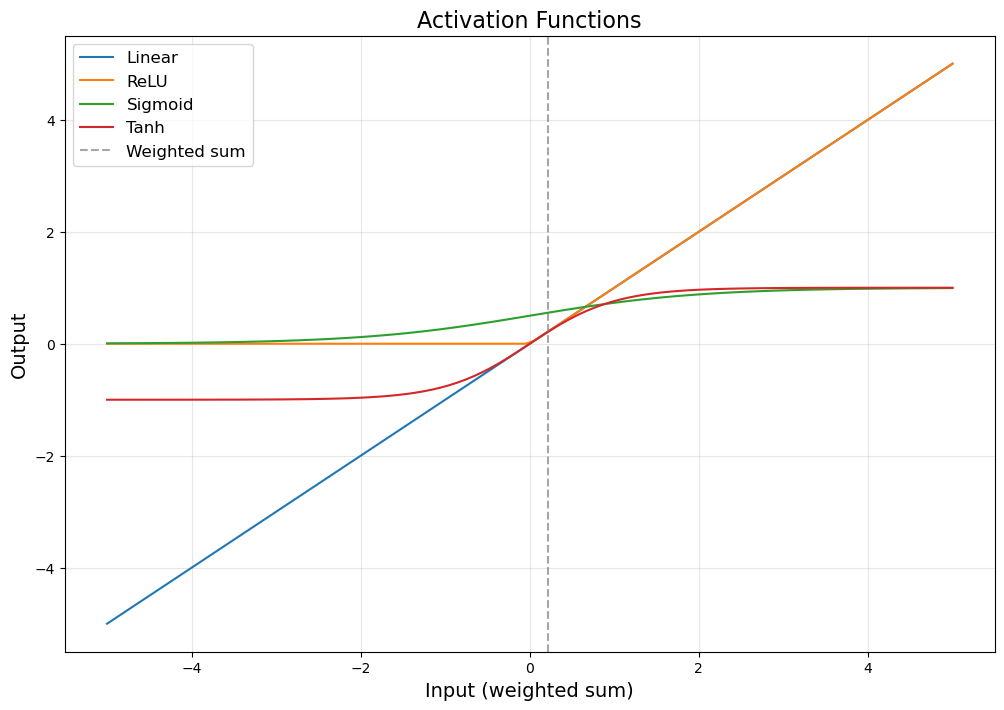

In [3]:
def single_neuron(inputs, weights, bias, activation_function="relu"):
    """Calculate the output of a single neuron"""
    # Weighted sum of inputs plus bias
    weighted_sum = sum([inputs[i] * weights[i] for i in range(len(inputs))]) + bias

    # Apply activation function
    if activation_function == "relu":
        # ReLU: max(0, x)
        output = max(0, weighted_sum)
    elif activation_function == "sigmoid":
        # Sigmoid: 1 / (1 + e^(-x))
        output = 1 / (1 + np.exp(-weighted_sum))
    elif activation_function == "tanh":
        # Tanh: (e^x - e^(-x)) / (e^x + e^(-x))
        output = np.tanh(weighted_sum)
    else:
        # Linear: no activation function
        output = weighted_sum

    return output, weighted_sum


# Example inputs, weights, and bias
inputs = [0.5, 0.3, 0.2, 0.8]
weights = [0.4, -0.2, 0.1, 0.7]
bias = -0.5

# Calculate the output for different activation functions
activation_functions = ["linear", "relu", "sigmoid", "tanh"]
results = {}

for activation in activation_functions:
    output, weighted_sum = single_neuron(inputs, weights, bias, activation)
    results[activation] = (output, weighted_sum)

# Display the results
print("Inputs:", inputs)
print("Weights:", weights)
print("Bias:", bias)
print("\nWeighted sum:", results["linear"][1])
print("\nOutputs with different activation functions:")
for activation, (output, _) in results.items():
    print(f"{activation.capitalize()}: {output:.4f}")

# Visualize the activation functions
x = np.linspace(-5, 5, 100)
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)

plt.figure(figsize=(12, 8))
plt.plot(x, x, label="Linear")
plt.plot(x, relu, label="ReLU")
plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, tanh, label="Tanh")
plt.axvline(x=results["linear"][1], color="gray", linestyle="--", alpha=0.7, label="Weighted sum")
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.title("Activation Functions", fontsize=16)
plt.xlabel("Input (weighted sum)", fontsize=14)
plt.ylabel("Output", fontsize=14)
plt.show()

## Activation Functions

Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns. Here are some common activation functions:

### 1. ReLU (Rectified Linear Unit)

$$f(x) = max(0, x)$$

- Pros: Simple and efficient computation, helps with vanishing gradient problem
- Cons: Can cause "dying ReLU" problem where neurons become inactive
- Usage: Default choice for hidden layers in many networks

### 2. Sigmoid

$$f(x) = \frac{1}{1 + e^{-x}}$$

- Pros: Outputs between 0 and 1, good for binary classification
- Cons: Suffers from vanishing gradient problem
- Usage: Output layer for binary classification, less common in hidden layers

### 3. Tanh (Hyperbolic Tangent)

$$f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

- Pros: Outputs between -1 and 1, zero-centered
- Cons: Still has vanishing gradient problem
- Usage: Hidden layers, especially in RNNs

### 4. Softmax

$$f(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$$

- Pros: Converts values to probabilities (sum to 1)
- Cons: Computationally expensive
- Usage: Output layer for multi-class classification


## Training Neural Networks

Training a neural network involves two main processes:

1. **Forward Propagation**: Computing outputs from inputs using weights and biases
2. **Backpropagation**: Updating weights and biases based on prediction errors

### The Training Loop

1. **Initialize**: Set random weights and biases
2. **Forward Pass**: Calculate output for training examples
3. **Calculate Loss**: Measure the difference between predicted and actual outputs
4. **Backward Pass**: Calculate gradients of the loss with respect to parameters
5. **Update Parameters**: Adjust weights and biases using an optimization algorithm
6. **Repeat**: Continue until the network converges or reaches a maximum number of iterations

### Backpropagation and Gradient Descent

**Backpropagation** is an algorithm for efficiently calculating gradients in neural networks by applying the chain rule of calculus.

**Gradient Descent** is an optimization algorithm that updates weights in the direction that reduces the loss function:

$$w_{new} = w_{old} - \alpha \frac{\partial Loss}{\partial w}$$

Where $\alpha$ is the learning rate, which controls the step size.

Let's see a simplified visualization of gradient descent:


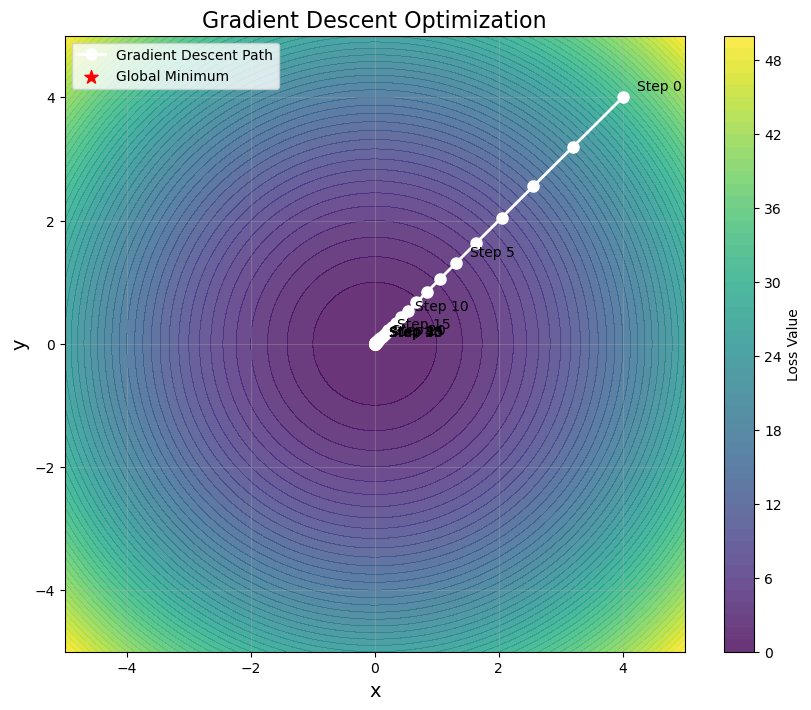

Starting point: (4.0, 4.0)
Final point after 50 iterations: (0.000057, 0.000057)
Loss value reduced from 32.00 to 0.000000


In [4]:
# Gradient Descent Visualization
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation


# Define a simple loss function: f(x, y) = x^2 + y^2
def loss_function(x, y):
    return x**2 + y**2


# Calculate gradients: df/dx = 2x, df/dy = 2y
def gradient(x, y):
    return 2 * x, 2 * y


# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = loss_function(X, Y)

# Starting point and learning rate
start_x, start_y = 4.0, 4.0
learning_rate = 0.1
num_iterations = 50

# Perform gradient descent
path_x, path_y = [start_x], [start_y]
current_x, current_y = start_x, start_y

for _ in range(num_iterations):
    grad_x, grad_y = gradient(current_x, current_y)
    current_x -= learning_rate * grad_x
    current_y -= learning_rate * grad_y
    path_x.append(current_x)
    path_y.append(current_y)

# Plot the contour and gradient descent path
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, 50, cmap="viridis", alpha=0.8)
plt.colorbar(label="Loss Value")
plt.plot(path_x, path_y, "wo-", linewidth=2, markersize=8, label="Gradient Descent Path")
plt.scatter(0, 0, c="red", s=100, marker="*", label="Global Minimum")

for i, (x, y) in enumerate(zip(path_x, path_y)):
    if i % 5 == 0 or i == len(path_x) - 1:  # Label every 5th point and the last point
        plt.annotate(f"Step {i}", (x, y), xytext=(10, 5), textcoords="offset points")

plt.title("Gradient Descent Optimization", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Starting point: ({start_x}, {start_y})")
print(f"Final point after {num_iterations} iterations: ({path_x[-1]:.6f}, {path_y[-1]:.6f})")
print(
    f"Loss value reduced from {loss_function(start_x, start_y):.2f} to {loss_function(path_x[-1], path_y[-1]):.6f}"
)

## Types of Neural Networks

There are many different neural network architectures, each specialized for different types of problems:

### 1. Feedforward Neural Networks (FNN)

- Simplest type of neural network
- Information flows in one direction: input → hidden layers → output
- Good for structured data and classification/regression tasks

### 2. Convolutional Neural Networks (CNN)

- Specialized for processing grid-like data (e.g., images)
- Uses convolutional layers to detect local patterns
- Includes pooling layers to reduce dimensionality
- Great for image classification, object detection, and computer vision tasks

### 3. Recurrent Neural Networks (RNN)

- Designed for sequential data (e.g., time series, text)
- Contains loops to maintain memory of previous inputs
- Variants include LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit)
- Used for language modeling, speech recognition, and time series prediction

### 4. Transformers

- Uses self-attention mechanisms to process sequences
- Parallelizable (unlike RNNs)
- Powers modern language models like GPT and BERT
- State-of-the-art for natural language processing tasks

Let's visualize these architectures:


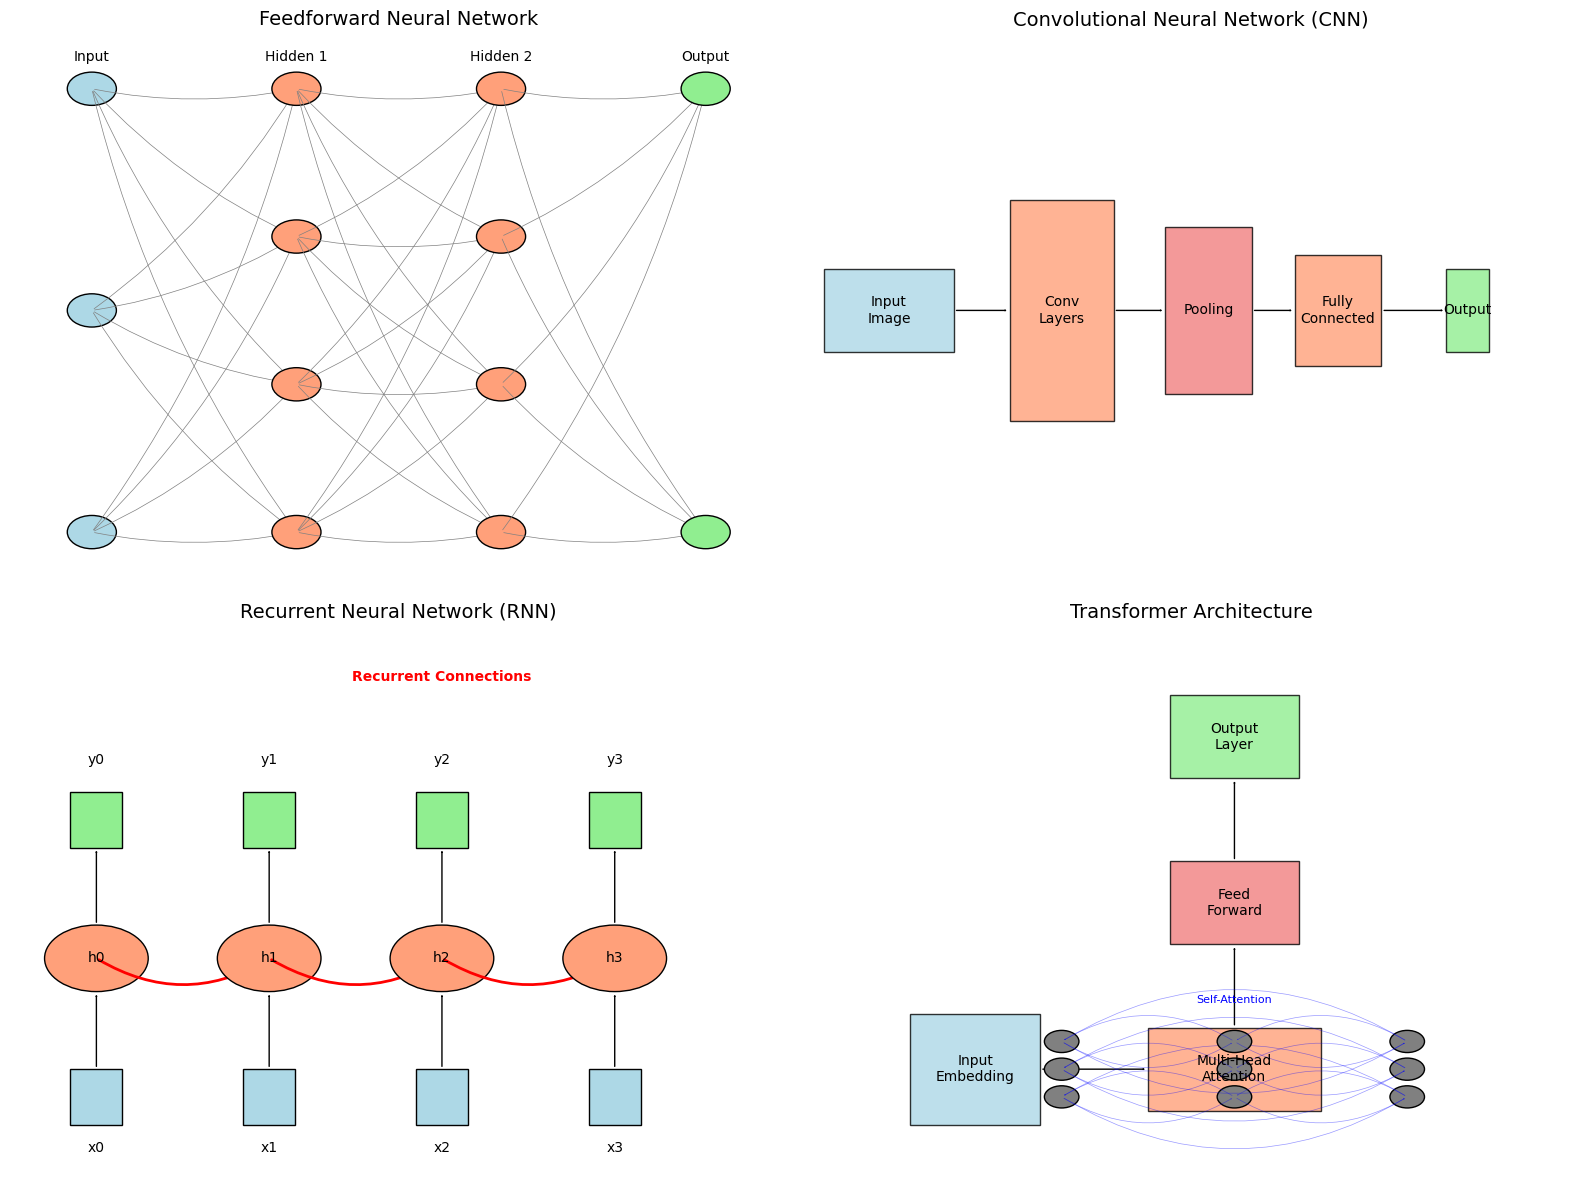

In [ ]:
# Neural Network Architecture Comparison
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, FancyArrowPatch, Circle

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

# 1. Feedforward Neural Network
ax = axs[0]
ax.set_title("Feedforward Neural Network", fontsize=14)

# Draw layers
layer_colors = ["lightblue", "lightsalmon", "lightsalmon", "lightgreen"]
layer_names = ["Input", "Hidden 1", "Hidden 2", "Output"]
layer_nodes = [3, 4, 4, 2]

for i, (color, name, nodes) in enumerate(zip(layer_colors, layer_names, layer_nodes)):
    x = i * 0.25
    for j in range(nodes):
        y = 0.1 + j * (0.8 / (nodes - 1)) if nodes > 1 else 0.5
        circle = Circle((x, y), 0.03, color=color, ec="black")
        ax.add_patch(circle)

        # Connect to next layer
        if i < len(layer_nodes) - 1:
            for k in range(layer_nodes[i + 1]):
                next_y = (
                    0.1 + k * (0.8 / (layer_nodes[i + 1] - 1)) if layer_nodes[i + 1] > 1 else 0.5
                )
                arrow = FancyArrowPatch(
                    (x, y),
                    (x + 0.25, next_y),
                    arrowstyle="->",
                    color="gray",
                    linewidth=0.5,
                    connectionstyle="arc3,rad=0.1",
                )
                ax.add_patch(arrow)

    ax.text(x, 0.95, name, ha="center")

ax.set_xlim(-0.1, 0.85)
ax.set_ylim(0, 1)
ax.axis("off")

# 2. Convolutional Neural Network (CNN)
ax = axs[1]
ax.set_title("Convolutional Neural Network (CNN)", fontsize=14)

# Draw CNN components
components = [
    {
        "name": "Input\nImage",
        "width": 0.15,
        "height": 0.15,
        "x": 0.1,
        "y": 0.5,
        "color": "lightblue",
    },
    {
        "name": "Conv\nLayers",
        "width": 0.12,
        "height": 0.4,
        "x": 0.3,
        "y": 0.5,
        "color": "lightsalmon",
    },
    {"name": "Pooling", "width": 0.1, "height": 0.3, "x": 0.47, "y": 0.5, "color": "lightcoral"},
    {
        "name": "Fully\nConnected",
        "width": 0.1,
        "height": 0.2,
        "x": 0.62,
        "y": 0.5,
        "color": "lightsalmon",
    },
    {"name": "Output", "width": 0.05, "height": 0.15, "x": 0.77, "y": 0.5, "color": "lightgreen"},
]

for comp in components:
    rect = Rectangle(
        (comp["x"] - comp["width"] / 2, comp["y"] - comp["height"] / 2),
        comp["width"],
        comp["height"],
        facecolor=comp["color"],
        edgecolor="black",
        alpha=0.8,
    )
    ax.add_patch(rect)
    ax.text(comp["x"], comp["y"], comp["name"], ha="center", va="center")

    # Add connecting arrows
    if comp != components[-1]:
        next_comp = components[components.index(comp) + 1]
        arrow = FancyArrowPatch(
            (comp["x"] + comp["width"] / 2, comp["y"]),
            (next_comp["x"] - next_comp["width"] / 2, next_comp["y"]),
            arrowstyle="->",
            color="black",
        )
        ax.add_patch(arrow)

ax.set_xlim(0, 0.9)
ax.set_ylim(0, 1)
ax.axis("off")

# 3. Recurrent Neural Network (RNN)
ax = axs[2]
ax.set_title("Recurrent Neural Network (RNN)", fontsize=14)

# Draw RNN with recurrent connections
# Input sequence
for i in range(4):
    x = 0.1 + i * 0.2
    rect = Rectangle((x - 0.03, 0.1), 0.06, 0.1, facecolor="lightblue", edgecolor="black")
    ax.add_patch(rect)
    ax.text(x, 0.05, f"x{i}", ha="center")

    # RNN cell
    circle = Circle((x, 0.4), 0.06, facecolor="lightsalmon", edgecolor="black")
    ax.add_patch(circle)
    ax.text(x, 0.4, f"h{i}", ha="center", va="center")

    # Output
    rect = Rectangle((x - 0.03, 0.6), 0.06, 0.1, facecolor="lightgreen", edgecolor="black")
    ax.add_patch(rect)
    ax.text(x, 0.75, f"y{i}", ha="center")

    # Vertical connections
    arrow1 = FancyArrowPatch((x, 0.2), (x, 0.34), arrowstyle="->", color="black")
    arrow2 = FancyArrowPatch((x, 0.46), (x, 0.6), arrowstyle="->", color="black")
    ax.add_patch(arrow1)
    ax.add_patch(arrow2)

    # Recurrent connection
    if i < 3:
        arrow3 = FancyArrowPatch(
            (x, 0.4),
            (x + 0.2, 0.4),
            arrowstyle="->",
            color="red",
            linewidth=2,
            connectionstyle="arc3,rad=0.3",
        )
        ax.add_patch(arrow3)

ax.text(0.5, 0.9, "Recurrent Connections", color="red", ha="center", fontweight="bold")
ax.set_xlim(0, 0.9)
ax.set_ylim(0, 1)
ax.axis("off")

# 4. Transformer
ax = axs[3]
ax.set_title("Transformer Architecture", fontsize=14)

# Draw simplified transformer
components = [
    {
        "name": "Input\nEmbedding",
        "width": 0.15,
        "height": 0.2,
        "x": 0.2,
        "y": 0.2,
        "color": "lightblue",
    },
    {
        "name": "Multi-Head\nAttention",
        "width": 0.2,
        "height": 0.15,
        "x": 0.5,
        "y": 0.2,
        "color": "lightsalmon",
    },
    {
        "name": "Feed\nForward",
        "width": 0.15,
        "height": 0.15,
        "x": 0.5,
        "y": 0.5,
        "color": "lightcoral",
    },
    {
        "name": "Output\nLayer",
        "width": 0.15,
        "height": 0.15,
        "x": 0.5,
        "y": 0.8,
        "color": "lightgreen",
    },
]

for comp in components:
    rect = Rectangle(
        (comp["x"] - comp["width"] / 2, comp["y"] - comp["height"] / 2),
        comp["width"],
        comp["height"],
        facecolor=comp["color"],
        edgecolor="black",
        alpha=0.8,
    )
    ax.add_patch(rect)
    ax.text(comp["x"], comp["y"], comp["name"], ha="center", va="center")

# Add arrows
arrow1 = FancyArrowPatch((0.275, 0.2), (0.4, 0.2), arrowstyle="->", color="black")
arrow2 = FancyArrowPatch((0.5, 0.275), (0.5, 0.425), arrowstyle="->", color="black")
arrow3 = FancyArrowPatch((0.5, 0.575), (0.5, 0.725), arrowstyle="->", color="black")
ax.add_patch(arrow1)
ax.add_patch(arrow2)
ax.add_patch(arrow3)

# Self-attention visualized as connections between tokens
for i in range(3):
    y = 0.15 + i * 0.05
    circle1 = Circle((0.3, y), 0.02, facecolor="gray", edgecolor="black")
    circle2 = Circle((0.5, y), 0.02, facecolor="gray", edgecolor="black")
    circle3 = Circle((0.7, y), 0.02, facecolor="gray", edgecolor="black")
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(circle3)

    # Self-attention connections
    for start in [circle1, circle2, circle3]:
        for end in [circle1, circle2, circle3]:
            if start != end:
                arrow = FancyArrowPatch(
                    start.center,
                    end.center,
                    arrowstyle="->",
                    color="blue",
                    linewidth=0.5,
                    connectionstyle="arc3,rad=0.3",
                    alpha=0.4,
                )
                ax.add_patch(arrow)

ax.text(0.5, 0.32, "Self-Attention", color="blue", ha="center", fontsize=8)
ax.set_xlim(0, 0.9)
ax.set_ylim(0, 1)
ax.axis("off")

plt.tight_layout()
plt.show()

## Implementing a Simple Neural Network from Scratch

Let's implement a simple neural network with one hidden layer to understand the fundamentals:


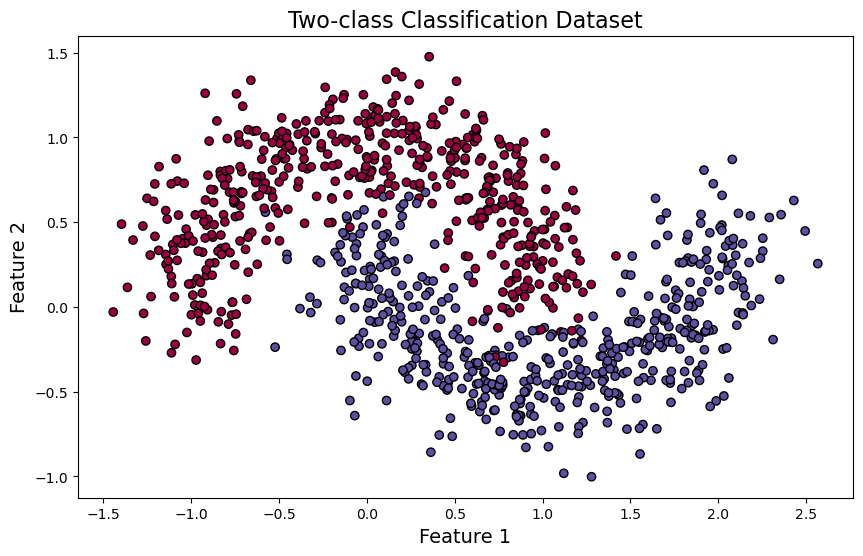

Epoch 0, Loss: 0.6932, Training Accuracy: 0.5086
Epoch 100, Loss: 0.6731, Training Accuracy: 0.8000
Epoch 200, Loss: 0.3894, Training Accuracy: 0.8243
Epoch 300, Loss: 0.3218, Training Accuracy: 0.8557
Epoch 400, Loss: 0.3068, Training Accuracy: 0.8614
Epoch 500, Loss: 0.3035, Training Accuracy: 0.8629
Epoch 600, Loss: 0.3027, Training Accuracy: 0.8657
Epoch 700, Loss: 0.3024, Training Accuracy: 0.8657
Epoch 800, Loss: 0.3022, Training Accuracy: 0.8657
Epoch 900, Loss: 0.3020, Training Accuracy: 0.8657

Test Accuracy: 0.8767


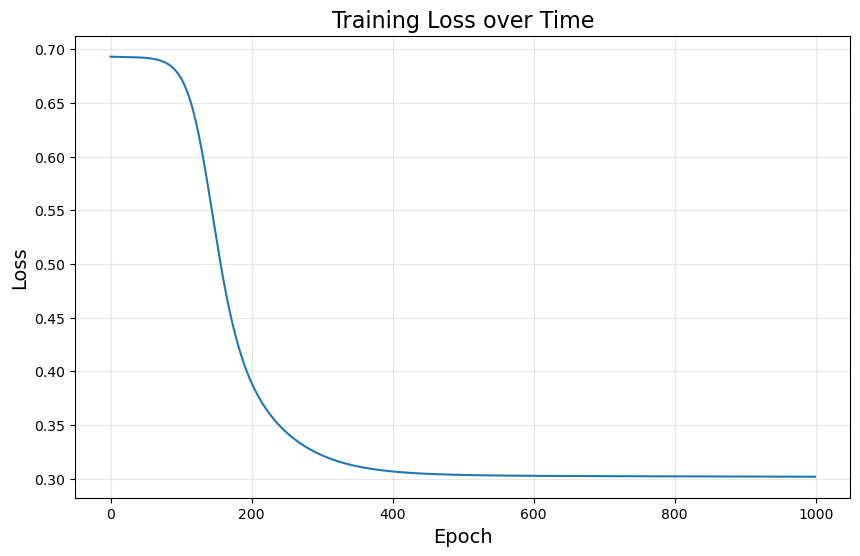

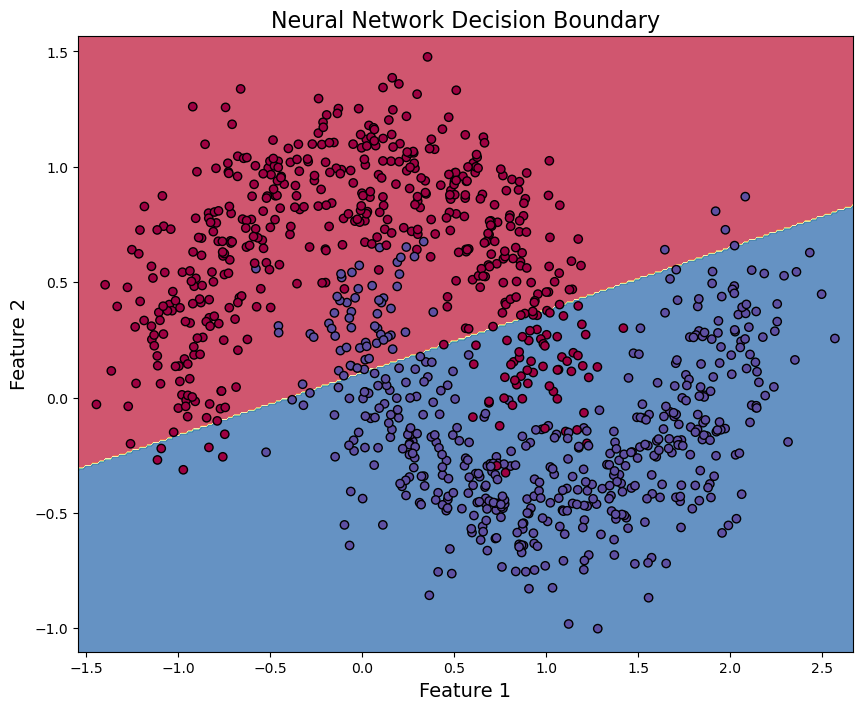

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor="k")
plt.title("Two-class Classification Dataset", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.show()


class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases with random values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """Derivative of sigmoid function"""
        return x * (1 - x)

    def forward(self, X):
        """Forward propagation"""
        # First layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)  # Using tanh for hidden layer

        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)  # Using sigmoid for binary classification

        return self.a2

    def backward(self, X, y, output, learning_rate):
        """Backward propagation"""
        # Calculate gradients
        m = X.shape[0]  # Number of examples

        # Output layer gradients
        dz2 = output - y.reshape(-1, 1)  # Error derivative for binary cross entropy
        dW2 = (1 / m) * np.dot(self.a1.T, dz2)
        db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)

        # Hidden layer gradients
        dz1 = np.dot(dz2, self.W2.T) * (1 - np.power(self.a1, 2))  # tanh derivative
        dW1 = (1 / m) * np.dot(X.T, dz1)
        db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

        # Update parameters
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, y, epochs, learning_rate):
        """Train the neural network"""
        losses = []

        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)

            # Calculate loss (binary cross entropy)
            loss = -np.mean(
                y.reshape(-1, 1) * np.log(output + 1e-8)
                + (1 - y.reshape(-1, 1)) * np.log(1 - output + 1e-8)
            )
            losses.append(loss)

            # Backward propagation
            self.backward(X, y, output, learning_rate)

            # Print progress
            if epoch % 100 == 0:
                accuracy = self.calculate_accuracy(X, y)
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Training Accuracy: {accuracy:.4f}")

        return losses

    def predict(self, X):
        """Make predictions"""
        output = self.forward(X)
        return (output >= 0.5).astype(int)

    def calculate_accuracy(self, X, y):
        """Calculate prediction accuracy"""
        predictions = self.predict(X)
        return np.mean(predictions.flatten() == y)


# Create and train the neural network
input_size = X_train.shape[1]  # 2 features
hidden_size = 5  # Number of neurons in hidden layer
output_size = 1  # Binary classification

nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)
losses = nn.train(X_train, y_train, epochs=1000, learning_rate=0.1)

# Evaluate on test data
test_accuracy = nn.calculate_accuracy(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title("Training Loss over Time", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()


# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    h = 0.01  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor="k")
    plt.title("Neural Network Decision Boundary", fontsize=16)
    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)
    plt.show()


# Plot the decision boundary
plot_decision_boundary(nn, X, y)

## Using Modern Deep Learning Frameworks

While understanding the fundamentals is important, in practice we use deep learning frameworks like TensorFlow, PyTorch, or Keras. Let's implement the same neural network using TensorFlow/Keras:


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6476 - loss: 0.5662 - val_accuracy: 0.8714 - val_loss: 0.2980
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8298 - loss: 0.3791 - val_accuracy: 0.9000 - val_loss: 0.2910
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8452 - loss: 0.3741 - val_accuracy: 0.8929 - val_loss: 0.2751
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8350 - loss: 0.3637 - val_accuracy: 0.9000 - val_loss: 0.2464
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8311 - loss: 0.3345 - val_accuracy: 0.9143 - val_loss: 0.2372
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8405 - loss: 0.3217 - val_accuracy: 0.9214 - val_loss: 0.2342
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8479 - loss: 0.3168 - val_accuracy: 0.9214 - val_loss: 0.2305
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8478 - loss: 0.3146 - val_accuracy: 0.9214 - 

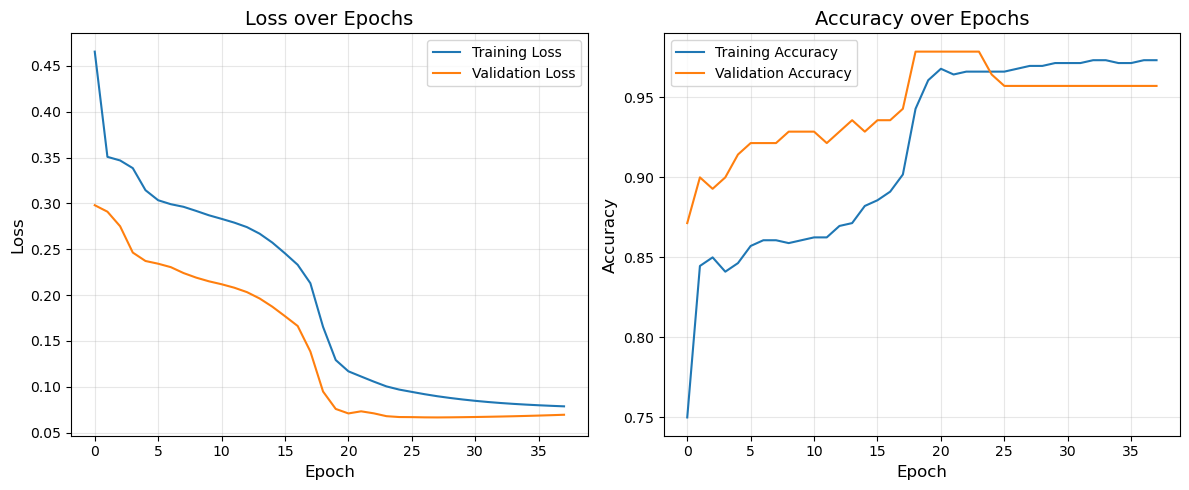

3535/3535 ━━━━━━━━━━━━━━━━━━━━ 2s 531us/step


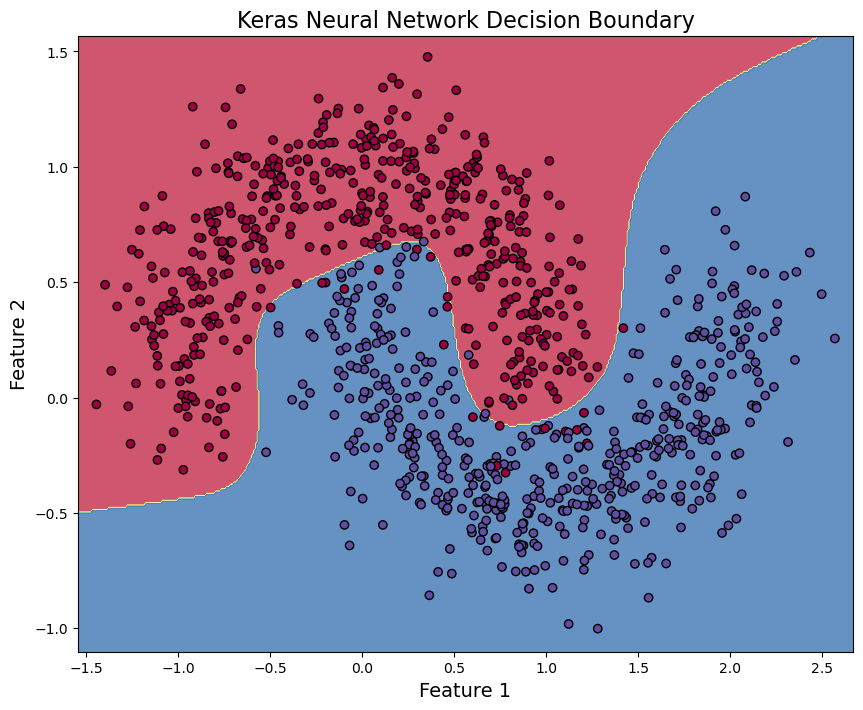

In [7]:
# Same task using TensorFlow/Keras
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping

    # Ensure deterministic results
    tf.random.set_seed(42)

    # Create the model
    model = Sequential(
        [
            Dense(5, activation="tanh", input_shape=(2,)),  # Hidden layer with 5 neurons
            Dense(1, activation="sigmoid"),  # Output layer
        ]
    )

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.1), loss="binary_crossentropy", metrics=["accuracy"]
    )

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping]
    )

    # Evaluate on test data
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"\nTensorFlow/Keras Test Accuracy: {accuracy:.4f}")

    # Plot training history
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss over Epochs", fontsize=14)
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy over Epochs", fontsize=14)
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Visualize the decision boundary for the Keras model
    h = 0.01  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor="k")
    plt.title("Keras Neural Network Decision Boundary", fontsize=16)
    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)
    plt.show()

except ImportError:
    print("TensorFlow not installed. To install, run: pip install tensorflow")

## Mini Exercise: Identify Neural Network Types

For each of the following tasks, identify which type of neural network architecture would be most appropriate:

1. Image classification (determining if a photo contains a cat or dog)
2. Stock price prediction based on historical data
3. Sentiment analysis of customer reviews
4. Generating captions for images
5. Machine translation from English to French
6. Anomaly detection in network traffic data

Think about your answers before checking the solutions below!


In [8]:
tasks = [
    "Image classification (determining if a photo contains a cat or dog)",
    "Stock price prediction based on historical data",
    "Sentiment analysis of customer reviews",
    "Generating captions for images",
    "Machine translation from English to French",
    "Anomaly detection in network traffic data",
]

answers = [
    "Convolutional Neural Network (CNN)",
    "Recurrent Neural Network (RNN) or LSTM",
    "Transformer (like BERT) or RNN",
    "CNN + RNN/Transformer (multimodal architecture)",
    "Transformer (like sequence-to-sequence models)",
    "Autoencoder or LSTM",
]

for i, task in enumerate(tasks):
    print(f"Task {i+1}: {task}")
    input("Your answer (press Enter to reveal): ")
    print(f"Answer: {answers[i]}\n")

Task 1: Image classification (determining if a photo contains a cat or dog)
Answer: Convolutional Neural Network (CNN)

Task 2: Stock price prediction based on historical data
Answer: Recurrent Neural Network (RNN) or LSTM

Task 3: Sentiment analysis of customer reviews
Answer: Transformer (like BERT) or RNN

Task 4: Generating captions for images
Answer: CNN + RNN/Transformer (multimodal architecture)

Task 5: Machine translation from English to French
Answer: Transformer (like sequence-to-sequence models)

Task 6: Anomaly detection in network traffic data
Answer: Autoencoder or LSTM



## Summary

In this lesson, we've covered:

1. **What is Deep Learning**: A subset of ML using multi-layered neural networks
2. **Neural Network Fundamentals**: Neurons, layers, weights, biases, and activation functions
3. **Training Process**: Forward propagation, backpropagation, and gradient descent
4. **Types of Neural Networks**: FNNs, CNNs, RNNs, and Transformers
5. **Implementation**: Building neural networks from scratch and with modern frameworks

Next lesson, we'll dive into Natural Language Processing (NLP) and see how deep learning is applied to language understanding.


## Further Reading

- [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville
- [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/) by Michael Nielsen
- [Stanford CS231n: Convolutional Neural Networks](http://cs231n.stanford.edu/)
- [TensorFlow Tutorials](https://www.tensorflow.org/tutorials)
- [PyTorch Tutorials](https://pytorch.org/tutorials/)
